In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

df_500 = pd.read_json('output/benchmark500.json')
df_1000 = pd.read_json('output/benchmark.json')
df_2000 = pd.read_json('output/benchmark2000.json')

df = pd.concat([df_500, df_1000, df_2000])
df

,protocol,total_requests,success_requests,failed_requests,average_latency,min_latency,max_latency,total_latency,total_bytes,average_body_size,start_time,end_time,total_duration,requests_per_sec,bytes_per_sec,mock_size
0,rest,10000,10000,0,151308559,8582708,1090356625,1513085591226,2475510000,247551,2025-02-01 21:00:51.106651+07:00,2025-02-01 21:01:07.089038+07:00,15982575958,625.681369,1.548880e+08,500
1,grpc,10000,10000,0,111739585,5793083,778702917,1117395852062,1402060000,140206,2025-02-01 21:01:07.101785+07:00,2025-02-01 21:01:19.078006+07:00,11976362125,834.978092,1.170689e+08,500
2,grpc-raw,10000,10000,0,48108083,2645958,275160750,481080839297,1402100000,140210,2025-02-01 21:01:19.083339+07:00,2025-02-01 21:01:24.044627+07:00,4961346042,2015.582045,2.826048e+08,500
0,rest,10000,10000,0,300057102,17183042,2008033917,3000571026628,4951930000,495193,2025-02-01 20:48:10.069562+07:00,2025-02-01 20:48:41.769245+07:00,31700057875,315.456837,1.562120e+08,1000
1,grpc,10000,10000,0,224623165,12242417,2154088959,2246231650867,2805280000,280528,2025-02-01 20:48:41.785009+07:00,2025-02-01 20:49:06.632758+07:00,24848041792,402.446200,1.128974e+08,1000
2,grpc-raw,10000,10000,0,115119924,5224542,448424208,1151199241119,2805320000,280532,2025-02-01 20:49:06.639958+07:00,2025-02-01 20:49:18.342305+07:00,11702485000,854.519361,2.397200e+08,1000
0,rest,10000,10000,0,596215721,34961250,3843442000,5962157218613,9924410000,992441,2025-02-01 20:58:05.293667+07:00,2025-02-01 20:59:08.198632+07:00,62905707417,158.968087,1.577664e+08,2000
1,grpc,10000,10000,0,449843739,22807375,1948110291,4498437397388,5632100000,563210,2025-02-01 20:59:08.226043+07:00,2025-02-01 20:59:56.350261+07:00,48124785375,207.793134,1.170312e+08,2000
2,grpc-raw,10000,10000,0,193289267,10225042,363193583,1932892674505,5632140000,563214,2025-02-01 20:59:56.362670+07:00,2025-02-01 21:00:15.831408+07:00,19468968083,513.637906,2.892881e+08,2000


In [58]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

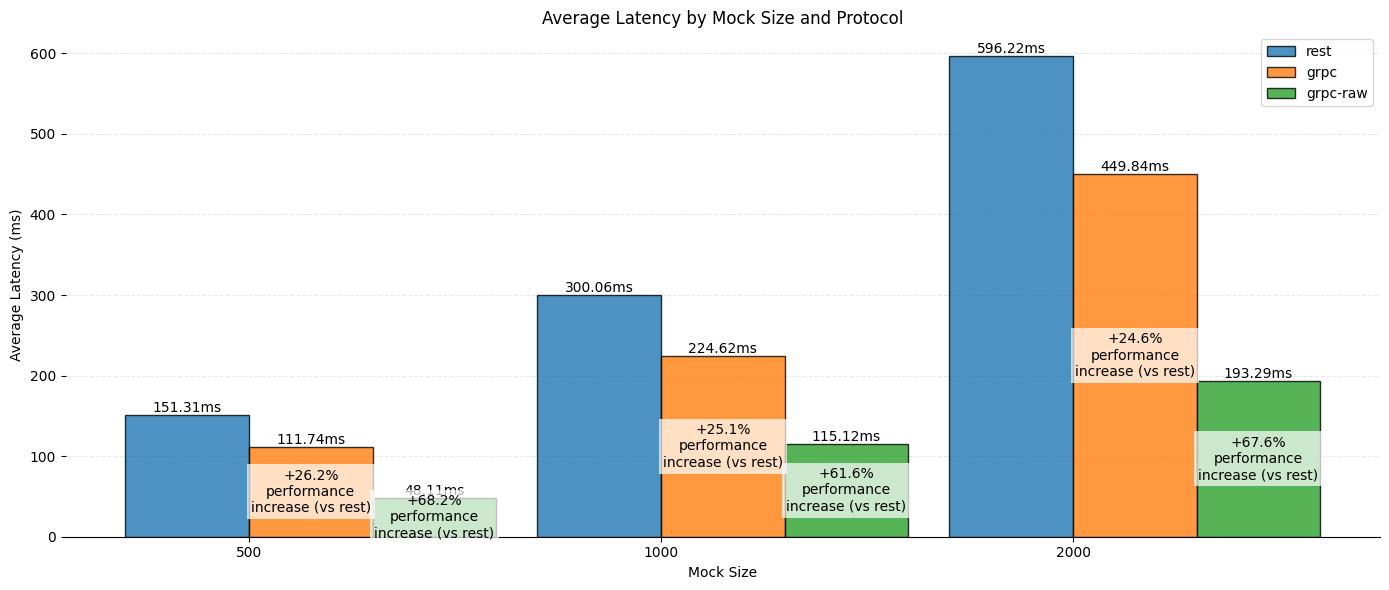

In [75]:
# Create grouped bar plot
mock_sizes = df['mock_size'].unique()
protocols = df['protocol'].unique()
x = np.arange(len(mock_sizes))
width = 0.3  # Width of bars

fig, ax = plt.subplots(figsize=(14,6))
for i, protocol in enumerate(protocols):
    data = df[df['protocol'] == protocol]
    offset = (i - 0.5) * width
    bars = plt.bar(x + offset, data['average_latency'] / 1000000, width,
                   label=f'{protocol}', zorder=2, edgecolor='black', alpha=0.8)

    # Add value labels on top of bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        # Add ms value for all bars
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}ms',
                ha='center', va='bottom', zorder=3)

        # Add performance increase % for gRPC bars
        if protocol != 'rest':
            size = mock_sizes[j]
            size_data = df[df['mock_size'] == size]
            rest_latency = size_data[size_data['protocol'] == 'rest']['average_latency'].values[0]
            current_latency = size_data[size_data['protocol'] == protocol]['average_latency'].values[0]
            percent_diff = ((rest_latency - current_latency) / rest_latency) * 100

            # Position text in middle of the bar
            y_pos = height/2
            plt.text(bar.get_x() + bar.get_width()/2., y_pos,
                    f'{percent_diff:+.1f}%\nperformance\nincrease (vs rest)',
                    ha='center', va='center', zorder=3,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))

ax.set_xlabel('Mock Size')
ax.set_ylabel('Average Latency (ms)')
ax.set_title('Average Latency by Mock Size and Protocol')
ax.set_xticks(x, mock_sizes)
ax.set_axisbelow(True)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)
plt.tight_layout()
plt.show()

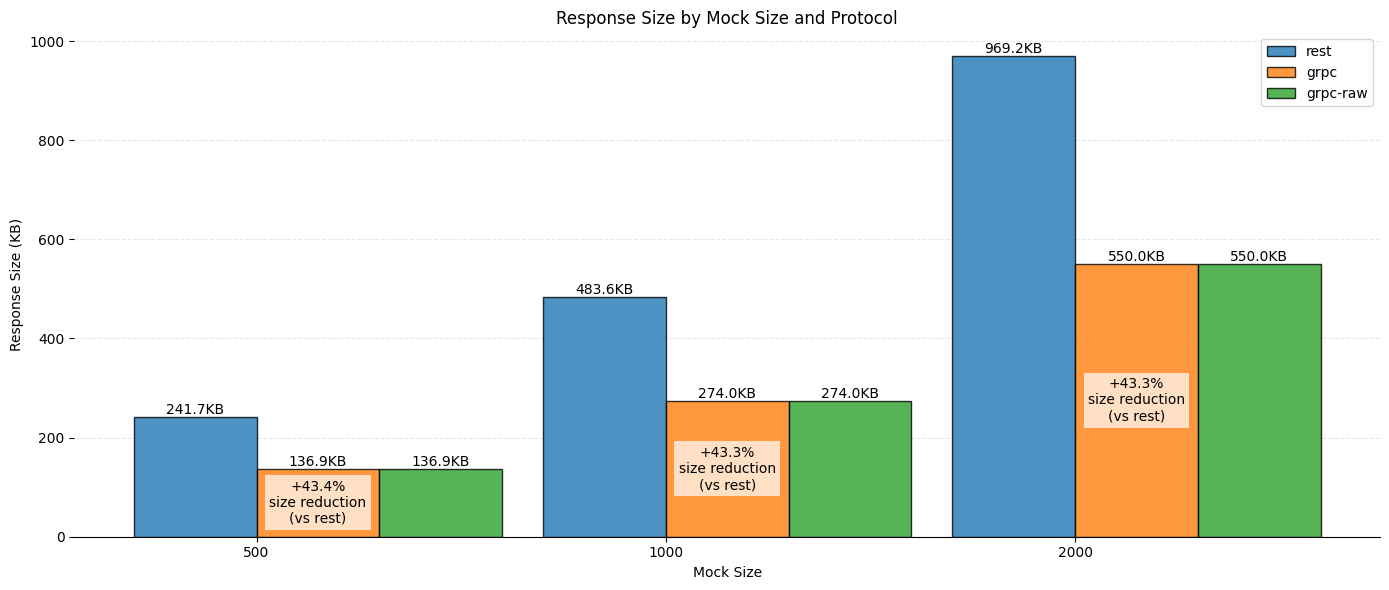

In [76]:
# Create grouped bar plot for response sizes
mock_sizes = df['mock_size'].unique()
protocols = df['protocol'].unique()
x = np.arange(len(mock_sizes))
width = 0.3  # Width of bars

fig, ax = plt.subplots(figsize=(14, 6))
for i, protocol in enumerate(protocols):
    data = df[df['protocol'] == protocol]
    offset = (i - 0.5) * width
    bars = plt.bar(x + offset, data['average_body_size'] / 1024, width,  # Convert to KB
                   label=f'{protocol}', zorder=2, edgecolor='black', alpha=0.8)

    # Add value labels on top of bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        # Add KB value for all bars
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}KB',
                ha='center', va='bottom', zorder=3)

        # Add size difference % for gRPC bars
        if protocol == 'grpc':
            size = mock_sizes[j]
            size_data = df[df['mock_size'] == size]
            rest_size = size_data[size_data['protocol'] == 'rest']['average_body_size'].values[0]
            current_size = size_data[size_data['protocol'] == protocol]['average_body_size'].values[0]
            percent_diff = ((rest_size - current_size) / rest_size) * 100

            # Position text in middle of the bar
            y_pos = height/2
            plt.text(bar.get_x() + bar.get_width()/2., y_pos,
                    f'{percent_diff:+.1f}%\nsize reduction\n(vs rest)',
                    ha='center', va='center', zorder=3,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))

ax.set_xlabel('Mock Size')
ax.set_ylabel('Response Size (KB)')
ax.set_title('Response Size by Mock Size and Protocol')
ax.set_xticks(x, mock_sizes)
ax.set_axisbelow(True)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)
plt.tight_layout()
plt.show()

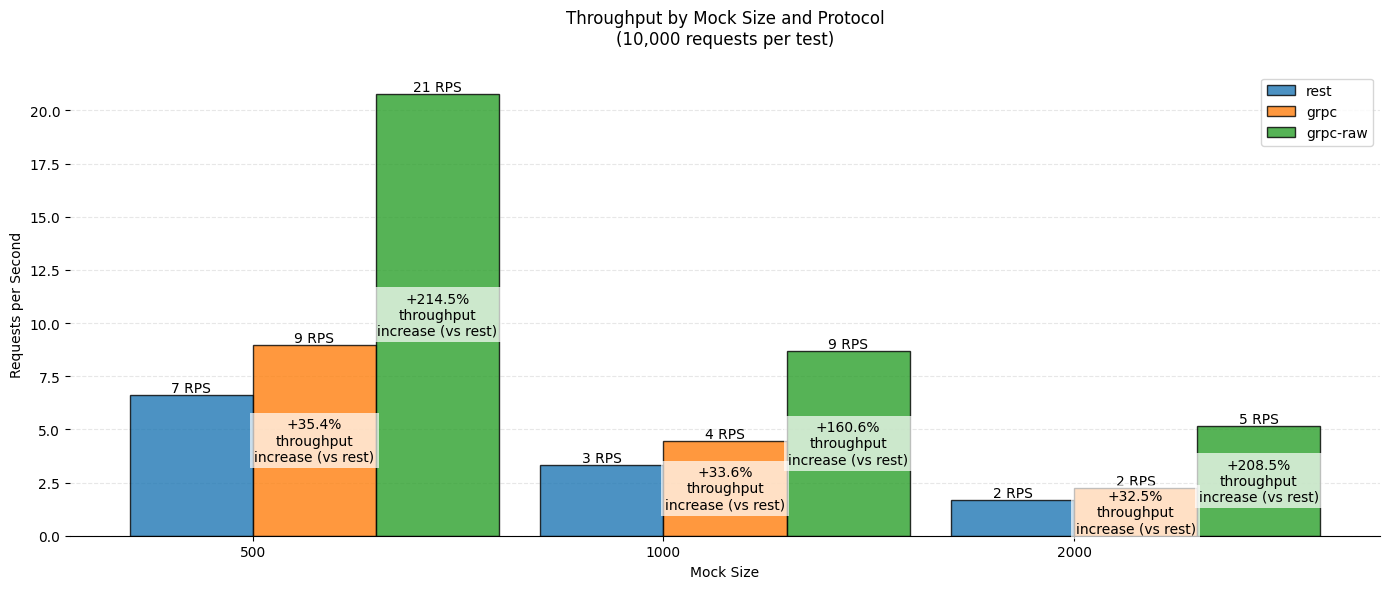

In [77]:
# Create grouped bar plot for requests per second
mock_sizes = df['mock_size'].unique()
protocols = df['protocol'].unique()
x = np.arange(len(mock_sizes))
width = 0.3  # Width of bars

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Throughput by Mock Size and Protocol\n(10,000 requests per test)', pad=20)

for i, protocol in enumerate(protocols):
    data = df[df['protocol'] == protocol]
    # Calculate requests per second (total_requests / (total_time in seconds))
    rps = data['total_requests'] / (data['total_latency'] / 1000000000)  # Convert ns to seconds

    offset = (i - 0.5) * width
    bars = plt.bar(x + offset, rps, width,
                   label=f'{protocol}', zorder=2, edgecolor='black', alpha=0.8)

    # Add value labels on top of bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        # Add RPS value for all bars
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f} RPS',
                ha='center', va='bottom', zorder=3)

        # Add performance increase % for gRPC bars
        if protocol != 'rest':
            size = mock_sizes[j]
            size_data = df[df['mock_size'] == size]
            rest_rps = size_data[size_data['protocol'] == 'rest']['total_requests'].values[0] / (size_data[size_data['protocol'] == 'rest']['total_latency'].values[0] / 1000000000)
            current_rps = size_data[size_data['protocol'] == protocol]['total_requests'].values[0] / (size_data[size_data['protocol'] == protocol]['total_latency'].values[0] / 1000000000)
            percent_diff = ((current_rps - rest_rps) / rest_rps) * 100

            # Position text in middle of the bar
            y_pos = height/2
            plt.text(bar.get_x() + bar.get_width()/2., y_pos,
                    f'{percent_diff:+.1f}%\nthroughput\nincrease (vs rest)',
                    ha='center', va='center', zorder=3,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))

ax.set_xlabel('Mock Size')
ax.set_ylabel('Requests per Second')
ax.set_xticks(x, mock_sizes)
ax.set_axisbelow(True)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)
plt.tight_layout()
plt.show()